# Objective

The objective of this analysis is to gain insights into Blinkit's operations and customer behavior by analyzing multiple datasets, including orders, deliveries, products, and returns. The focus is on understanding operational efficiency, product performance, and return patterns to help improve decision-making and optimize processes.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df = pd.read_csv('Orders.csv')
df.head()

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463


In [5]:
df.shape

(10000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   OrderID               10000 non-null  int64 
 1   CustomerID            10000 non-null  int64 
 2   OrderDateTime         10000 non-null  object
 3   ProductID             10000 non-null  int64 
 4   Quantity              10000 non-null  int64 
 5   TotalAmount           10000 non-null  int64 
 6   StoreID               10000 non-null  int64 
 7   OrderStatus           10000 non-null  object
 8   ExpectedDeliveryTime  10000 non-null  object
 9   ActualDeliveryTime    10000 non-null  object
dtypes: int64(6), object(4)
memory usage: 781.4+ KB


In [12]:
df['ExpectedDeliveryTime'] = pd.to_datetime(df['ExpectedDeliveryTime'])
df['ActualDeliveryTime'] = pd.to_datetime(df['ActualDeliveryTime'])
df['OrderDateTime'] = pd.to_datetime(df['OrderDateTime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderID               10000 non-null  int64         
 1   CustomerID            10000 non-null  int64         
 2   OrderDateTime         10000 non-null  datetime64[ns]
 3   ProductID             10000 non-null  int64         
 4   Quantity              10000 non-null  int64         
 5   TotalAmount           10000 non-null  int64         
 6   StoreID               10000 non-null  int64         
 7   OrderStatus           10000 non-null  object        
 8   ExpectedDeliveryTime  10000 non-null  datetime64[ns]
 9   ActualDeliveryTime    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(6), object(1)
memory usage: 781.4+ KB


In [14]:
df.head()

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463


In [15]:
df.isnull().sum()

OrderID                 0
CustomerID              0
OrderDateTime           0
ProductID               0
Quantity                0
TotalAmount             0
StoreID                 0
OrderStatus             0
ExpectedDeliveryTime    0
ActualDeliveryTime      0
dtype: int64

In [17]:
df.columns

Index(['OrderID', 'CustomerID', 'OrderDateTime', 'ProductID', 'Quantity',
       'TotalAmount', 'StoreID', 'OrderStatus', 'ExpectedDeliveryTime',
       'ActualDeliveryTime'],
      dtype='object')

In [18]:
df.describe()

,OrderID,CustomerID,ProductID,Quantity,TotalAmount,StoreID
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8000.50000,11000.50000,1024.915200,2.981500,501.416700,2049.074200
std,2886.89568,2886.89568,14.610303,1.413421,431.949384,28.908574
min,3001.00000,6001.00000,1000.000000,1.000000,14.000000,2000.000000
25%,5500.75000,8500.75000,1012.000000,2.000000,180.000000,2024.000000
50%,8000.50000,11000.50000,1025.000000,3.000000,385.000000,2049.000000
75%,10500.25000,13500.25000,1038.000000,4.000000,700.000000,2074.000000
max,13000.00000,16000.00000,1050.000000,5.000000,2995.000000,2099.000000


In [19]:
df.duplicated().sum()

0

In [20]:
total_revenue = df['TotalAmount'].sum()

total_orders = df['OrderID'].nunique()

total_customers = df['CustomerID'].nunique()

avg_order_value = total_revenue / total_orders

print("📊 Sales & Revenue KPIs")
print(f"Total Revenue: {total_revenue:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: {avg_order_value:.2f}")


📊 Sales & Revenue KPIs
Total Revenue: 5014167.00
Total Orders: 10000
Total Customers: 10000
Average Order Value: 501.42


In [21]:
store_performance = df.groupby('StoreID').agg(
    TotalRevenue=('TotalAmount', 'sum'),
    TotalOrders=('OrderID', 'nunique')
).reset_index()

store_performance['AvgOrderValue'] = store_performance['TotalRevenue'] / store_performance['TotalOrders']

print(store_performance)

    StoreID  TotalRevenue  TotalOrders  AvgOrderValue
0      2000         57329          118     485.838983
1      2001         43760           80     547.000000
2      2002         65430          108     605.833333
3      2003         43828           92     476.391304
4      2004         52843          100     528.430000
..      ...           ...          ...            ...
95     2095         59991          122     491.729508
96     2096         42265           97     435.721649
97     2097         59168          114     519.017544
98     2098         43369           76     570.644737
99     2099         51935           99     524.595960

[100 rows x 4 columns]


In [23]:
top_stores = store_performance.sort_values('TotalRevenue', ascending=False).head(10)

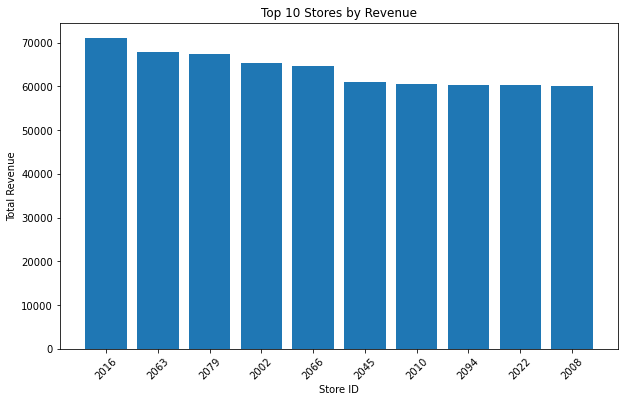

In [24]:
plt.figure(figsize=(10,6))
plt.bar(top_stores['StoreID'].astype(str), top_stores['TotalRevenue'])
plt.title("Top 10 Stores by Revenue")
plt.xlabel("Store ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [25]:
df["Expected_Delivery_inMinutes"] = (df["ExpectedDeliveryTime"]- df["OrderDateTime"]).dt.total_seconds()/60
df

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Expected_Delivery_inMinutes
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,10.0
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,10.0
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,10.0
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,10.0
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,10.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,10.0
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,10.0
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,10.0
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0


In [27]:
df["Actual_Delivery_inMinutes"] = (df["ActualDeliveryTime"]- df["OrderDateTime"]).dt.total_seconds()/60
df

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Expected_Delivery_inMinutes,Actual_Delivery_inMinutes
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,10.0,25.0
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,10.0,12.0
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,10.0,12.0
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,10.0,25.0
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,10.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,10.0,15.0
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,10.0,20.0
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,10.0,12.0
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0,10.0


In [28]:
df["difference_between_expected_and_actual"] = df["Expected_Delivery_inMinutes"] - df["Actual_Delivery_inMinutes"]
df

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Expected_Delivery_inMinutes,Actual_Delivery_inMinutes,difference_between_expected_and_actual
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,10.0,25.0,-15.0
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,10.0,12.0,-2.0
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,10.0,12.0,-2.0
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,10.0,25.0,-15.0
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,10.0,25.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,10.0,15.0,-5.0
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,10.0,20.0,-10.0
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,10.0,12.0,-2.0
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0,10.0,0.0


In [37]:
df.loc[(df["difference_between_expected_and_actual"] == 0), "order_status"]="on time"
df.loc[(df["difference_between_expected_and_actual"] < 0), "order_status"]="Delayed"
df

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Expected_Delivery_inMinutes,Actual_Delivery_inMinutes,difference_between_expected_and_actual,order_status
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,10.0,25.0,-15.0,Delayed
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,10.0,12.0,-2.0,Delayed
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,10.0,12.0,-2.0,Delayed
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,10.0,25.0,-15.0,Delayed
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,10.0,25.0,-15.0,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,10.0,15.0,-5.0,Delayed
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,10.0,20.0,-10.0,Delayed
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,10.0,12.0,-2.0,Delayed
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0,10.0,0.0,on time


In [31]:
print(df[["OrderID", "Expected_Delivery_inMinutes", "Actual_Delivery_inMinutes", 
          "difference_between_expected_and_actual", "order_status"]].head())

   OrderID  Expected_Delivery_inMinutes  Actual_Delivery_inMinutes  \
0     3001                         10.0                       25.0   
1     3002                         10.0                       12.0   
2     3003                         10.0                       12.0   
3     3004                         10.0                       25.0   
4     3005                         10.0                       25.0   

   difference_between_expected_and_actual order_status  
0                                   -15.0      Delayed  
1                                    -2.0      Delayed  
2                                    -2.0      Delayed  
3                                   -15.0      Delayed  
4                                   -15.0      Delayed  


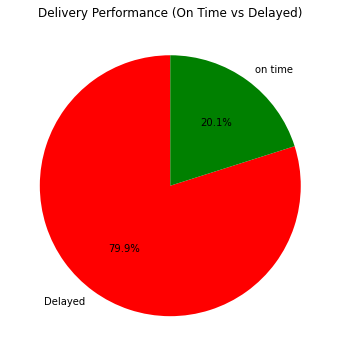

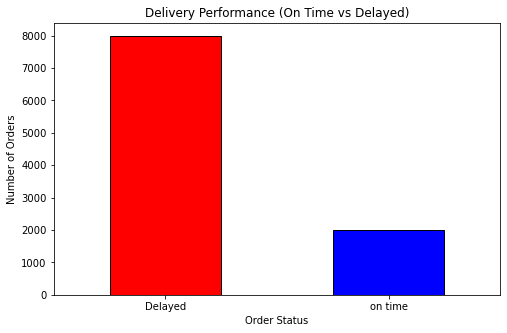

In [39]:
# Count values
status_counts = df["order_status"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=90, colors=["red", "green"])
plt.title("Delivery Performance (On Time vs Delayed)")
plt.show()

plt.figure(figsize=(8,5))
status_counts.plot(kind="bar", color=["red", "blue"], edgecolor="black")
plt.title("Delivery Performance (On Time vs Delayed)")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.show()

In [43]:
print(store_performance.columns.tolist())

['Delayed', 'on time']


In [44]:
on_time_col = 'on time'
delayed_col = 'Delayed'

store_performance["OnTime%"] = (store_performance[on_time_col] / store_performance.sum(axis=1)) * 100

best_store = store_performance["OnTime%"].idxmax()
worst_store = store_performance["OnTime%"].idxmin()

print("✅ Best Store (highest on-time %):", best_store)
print("❌ Worst Store (lowest on-time %):", worst_store)

best_worst = store_performance.loc[[best_store, worst_store], [on_time_col, delayed_col]]
print(best_worst)

✅ Best Store (highest on-time %): 2000
❌ Worst Store (lowest on-time %): 2081
order_status  on time  Delayed
StoreID                       
2000               39       79
2081               11       84


In [46]:
Delivery = pd.read_csv('Delivery.csv')
Delivery.head()

,DeliveryID,OrderID,DeliveryPartnerName,PickupTime,DeliveryEndTime,DistanceTraveled
0,7001,3001,Arjun Nair,04:03.4,27:03.4,1.98
1,7002,3002,Arjun Nair,00:03.4,10:03.4,7.93
2,7003,3003,Rohit Sharma,00:03.4,10:03.4,4.67
3,7004,3004,Sneha Patil,02:03.4,25:03.4,6.93
4,7005,3005,Karan Mehta,45:03.4,08:03.4,9.33


In [47]:
Delivery.columns

Index(['DeliveryID', 'OrderID', 'DeliveryPartnerName', 'PickupTime',
       'DeliveryEndTime', 'DistanceTraveled'],
      dtype='object')

In [51]:
Delivery['pickup_duration'] = pd.to_timedelta('00:' + Delivery['PickupTime'])
Delivery['delivery_duration'] = pd.to_timedelta('00:' + Delivery['DeliveryEndTime'])

In [52]:
Delivery.head()

,DeliveryID,OrderID,DeliveryPartnerName,PickupTime,DeliveryEndTime,DistanceTraveled,pickup_duration,delivery_duration
0,7001,3001,Arjun Nair,04:03.4,27:03.4,1.98,0 days 00:04:03.400000,0 days 00:27:03.400000
1,7002,3002,Arjun Nair,00:03.4,10:03.4,7.93,0 days 00:00:03.400000,0 days 00:10:03.400000
2,7003,3003,Rohit Sharma,00:03.4,10:03.4,4.67,0 days 00:00:03.400000,0 days 00:10:03.400000
3,7004,3004,Sneha Patil,02:03.4,25:03.4,6.93,0 days 00:02:03.400000,0 days 00:25:03.400000
4,7005,3005,Karan Mehta,45:03.4,08:03.4,9.33,0 days 00:45:03.400000,0 days 00:08:03.400000


In [53]:
partner_counts = Delivery['DeliveryPartnerName'].value_counts()
print(partner_counts)

Karan Mehta     1054
Amit Singh      1034
Simran Kaur     1030
Priya Das       1008
Arjun Nair      1004
Rahul Jain       995
Rohit Sharma     986
Sneha Patil      966
Vikram Verma     962
Divya Rao        961
Name: DeliveryPartnerName, dtype: int64


In [54]:
distance_by_partner = Delivery.groupby('DeliveryPartnerName')['DistanceTraveled'].sum().sort_values(ascending=False)
print(distance_by_partner)

DeliveryPartnerName
Karan Mehta     6036.05
Amit Singh      5968.76
Simran Kaur     5967.51
Rahul Jain      5818.84
Arjun Nair      5789.29
Priya Das       5780.30
Rohit Sharma    5705.77
Sneha Patil     5652.41
Vikram Verma    5507.54
Divya Rao       5397.91
Name: DistanceTraveled, dtype: float64


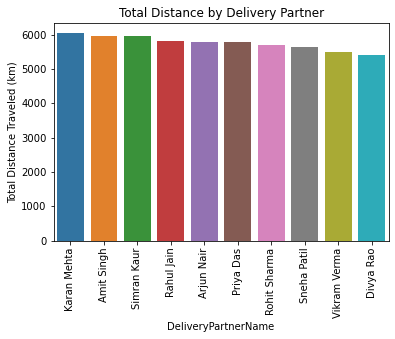

In [55]:
sns.barplot(x=distance_by_partner.index, y=distance_by_partner.values)
plt.xticks(rotation=90)
plt.ylabel("Total Distance Traveled (km)")
plt.title("Total Distance by Delivery Partner")
plt.show()

In [60]:
avg_duration_by_partner = Delivery.groupby('DeliveryPartnerName')['delivery_duration'].mean().sort_values()
print(avg_duration_by_partner)

DeliveryPartnerName
Simran Kaur    0 days 00:29:11.380582524
Sneha Patil    0 days 00:29:16.319254658
Amit Singh     0 days 00:29:17.152417794
Priya Das      0 days 00:29:20.542857142
Rahul Jain     0 days 00:29:28.304522613
Arjun Nair     0 days 00:29:37.822310756
Karan Mehta    0 days 00:29:51.047058823
Divya Rao      0 days 00:30:03.462434963
Rohit Sharma   0 days 00:30:06.077484787
Vikram Verma   0 days 00:30:25.603742203
Name: delivery_duration, dtype: timedelta64[ns]


In [62]:
products = pd.read_csv('Products.csv')
products.head()

,ProductID,ProductName,Category,Brand,PricePerUnit,StockQuantity
0,1000,Amul Taaza Milk 1L,Dairy,Amul,72,564
1,1001,Amul Butter 500g,Dairy,Amul,260,409
2,1002,Mother Dairy Curd 400g,Dairy,Mother Dairy,40,485
3,1003,Aashirvaad Atta 5kg,Grocery,Aashirvaad,255,236
4,1004,Tata Salt 1kg,Grocery,Tata,28,539


In [63]:
print(products.head())
print(products.info())
print(products.describe())

   ProductID             ProductName Category         Brand  PricePerUnit  \
0       1000      Amul Taaza Milk 1L    Dairy          Amul            72   
1       1001        Amul Butter 500g    Dairy          Amul           260   
2       1002  Mother Dairy Curd 400g    Dairy  Mother Dairy            40   
3       1003     Aashirvaad Atta 5kg  Grocery    Aashirvaad           255   
4       1004           Tata Salt 1kg  Grocery          Tata            28   

   StockQuantity  
0            564  
1            409  
2            485  
3            236  
4            539  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductID      51 non-null     int64 
 1   ProductName    51 non-null     object
 2   Category       51 non-null     object
 3   Brand          51 non-null     object
 4   PricePerUnit   51 non-null     int64 
 5   StockQuantity  

In [65]:
top_expensive = products.sort_values('PricePerUnit', ascending=False).head(10)
print(top_expensive[['ProductName', 'PricePerUnit']])

                         ProductName  PricePerUnit
21                 Patanjali Ghee 1L           599
47    Head & Shoulders Shampoo 650ml           385
29         Horlicks Classic Malt 1kg           385
37            Dabur Chyawanprash 1kg           350
32       Whisper Ultra Pads (30 pcs)           320
26              Gillette Mach3 Razor           299
41  Nestle Everyday Milk Powder 500g           275
1                   Amul Butter 500g           260
3                Aashirvaad Atta 5kg           255
49       Gillette Shaving Foam 200ml           240


In [67]:
unique_categories = products['Category'].unique()
print(unique_categories)

['Dairy' 'Grocery' 'Snacks' 'Vegetables' 'Fruits' 'Personal Care'
 'Beverages' 'Health' 'Electronics']


In [69]:
category_counts = products['Category'].value_counts()
print(category_counts)

Grocery          12
Personal Care    11
Beverages        11
Snacks            8
Dairy             4
Fruits            2
Vegetables        1
Health            1
Electronics       1
Name: Category, dtype: int64


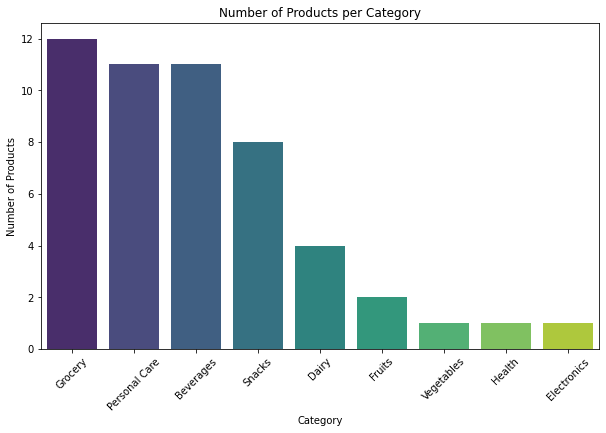

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.title("Number of Products per Category")
plt.show()

In [71]:
brand_category_counts = products.groupby(['Category', 'Brand'])['ProductID'].count().reset_index()
brand_category_counts.rename(columns={'ProductID': 'product_count'}, inplace=True)


In [72]:
top_brands_per_category = brand_category_counts.sort_values(['Category', 'product_count'], ascending=[True, False]).groupby('Category').head(1)
print(top_brands_per_category)

         Category       Brand  product_count
6       Beverages        Real              2
9           Dairy        Amul              2
12    Electronics    Eveready              1
13         Fruits  Farm Fresh              2
14        Grocery  Aashirvaad              1
26         Health       Dabur              1
31  Personal Care    Gillette              2
37         Snacks   Britannia              2
44     Vegetables  Farm Fresh              1


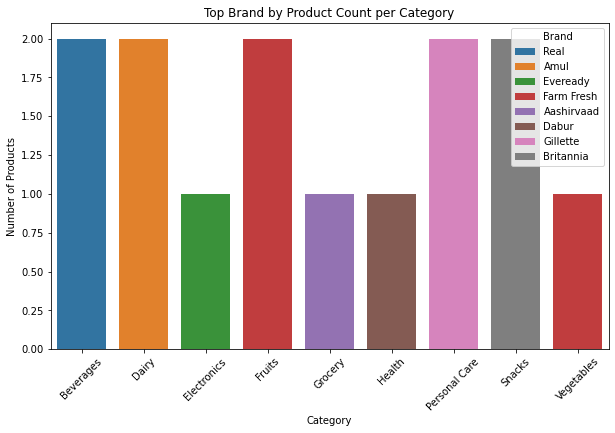

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_brands_per_category, x='Category', y='product_count', hue='Brand', dodge=False, palette="tab10")
plt.xticks(rotation=45)
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.title("Top Brand by Product Count per Category")
plt.legend(title='Brand')
plt.show()

In [75]:
avg_price_category = products.groupby('Category')['PricePerUnit'].mean().sort_values(ascending=False)
print(avg_price_category)


Category
Health           350.000000
Grocery          211.750000
Personal Care    192.090909
Dairy            161.750000
Beverages        155.818182
Fruits           120.000000
Electronics      110.000000
Snacks            98.000000
Vegetables        35.000000
Name: PricePerUnit, dtype: float64


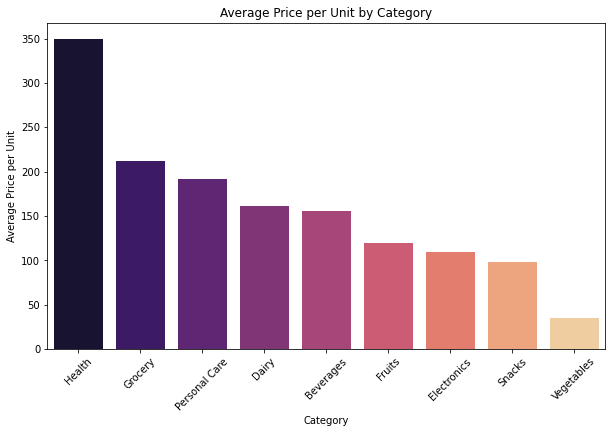

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_category.index, y=avg_price_category.values, palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Average Price per Unit")
plt.xlabel("Category")
plt.title("Average Price per Unit by Category")
plt.show()

In [79]:
product_brand_price = products.groupby(['ProductName', 'Brand'])['PricePerUnit'].mean().reset_index()
print(product_brand_price.head(20)) 

                       ProductName        Brand  PricePerUnit
0              Aashirvaad Atta 5kg   Aashirvaad         255.0
1                 Amul Butter 500g         Amul         260.0
2               Amul Taaza Milk 1L         Amul          72.0
3                 Bananas (12 pcs)   Farm Fresh          60.0
4                   Bournvita 500g      Cadbury         225.0
5   Britannia Good Day Cashew 600g    Britannia         150.0
6       Brooke Bond Red Label 500g  Brooke Bond         170.0
7     Cadbury Dairy Milk Silk 150g      Cadbury         160.0
8          Catch Black Pepper 100g        Catch         150.0
9                     Coca-Cola 2L    Coca-Cola          90.0
10         Colgate Toothpaste 200g      Colgate         115.0
11          Dabur Chyawanprash 1kg        Dabur         350.0
12                Dabur Honey 500g        Dabur         199.0
13       Dabur Red Toothpaste 200g        Dabur          99.0
14           Dettol Handwash 750ml       Dettol         145.0
15      

In [82]:
Return = pd.read_csv('Returns.csv')
Return.head()

,ReturnID,OrderID,ProductID,CustomerID,StoreID,ReturnReason,ReturnDate,RefundAmount,ReturnStatus
0,17794,12794,1011,15794,2075,Stale Product,2025-02-12 08:33:03.428463,300,Processed
1,13898,8898,1030,11898,2050,Damaged Item,2025-01-25 20:43:03.428463,875,Processed
2,17271,12271,1012,15271,2056,Damaged Item,2025-02-08 22:13:03.428463,360,Processed
3,12959,7959,1028,10959,2050,Stale Product,2025-02-11 06:23:03.428463,600,Processed
4,13863,8863,1024,11863,2016,Stale Product,2025-02-22 05:21:03.428463,1125,Processed


In [83]:
Return.columns

Index(['ReturnID', 'OrderID', 'ProductID', 'CustomerID', 'StoreID',
       'ReturnReason', 'ReturnDate', 'RefundAmount', 'ReturnStatus'],
      dtype='object')

In [84]:
Return.columns = Return.columns.str.strip().str.lower().str.replace(" ", "_")

In [85]:
Return['returndate'] = pd.to_datetime(Return['returndate'])

In [86]:
Return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   returnid      1000 non-null   int64         
 1   orderid       1000 non-null   int64         
 2   productid     1000 non-null   int64         
 3   customerid    1000 non-null   int64         
 4   storeid       1000 non-null   int64         
 5   returnreason  1000 non-null   object        
 6   returndate    1000 non-null   datetime64[ns]
 7   refundamount  1000 non-null   int64         
 8   returnstatus  1000 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 70.4+ KB


In [87]:
total_returns = len(Return)
total_refund = Return['refundamount'].sum()

print(f"Total Returns: {total_returns}")
print(f"Total Refund Amount: {total_refund}")

Total Returns: 1000
Total Refund Amount: 479203


In [88]:
return_reason_counts = Return['returnreason'].value_counts()
print(return_reason_counts)

Stale Product    522
Damaged Item     478
Name: returnreason, dtype: int64


In [89]:
returns_by_store = Return.groupby('storeid')['returnid'].count().sort_values(ascending=False)
print(returns_by_store)

storeid
2053    18
2073    17
2029    16
2004    16
2045    15
        ..
2043     5
2025     3
2057     3
2068     2
2082     2
Name: returnid, Length: 100, dtype: int64


In [90]:
top_refunded_products = Return.groupby('productid')['refundamount'].sum().sort_values(ascending=False).head(10)
print(top_refunded_products)

productid
1021    25158
1029    23870
1032    23680
1024    19125
1041    18150
1001    16380
1034    16380
1047    16170
1018    15200
1049    15120
Name: refundamount, dtype: int64


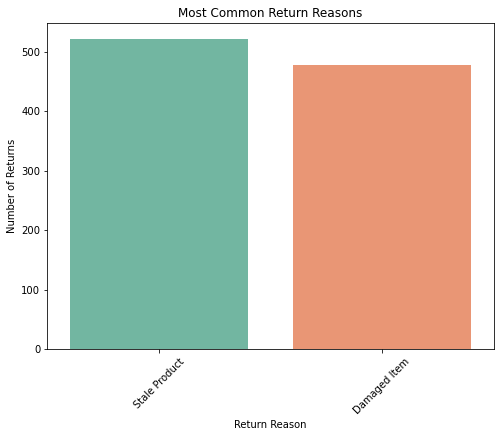

In [91]:
plt.figure(figsize=(8,6))
sns.barplot(x=return_reason_counts.index, y=return_reason_counts.values, palette="Set2")
plt.xticks(rotation=45)
plt.ylabel("Number of Returns")
plt.xlabel("Return Reason")
plt.title("Most Common Return Reasons")
plt.show()

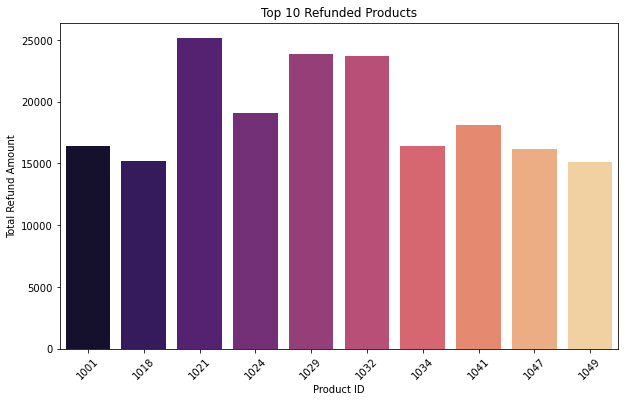

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_refunded_products.index, y=top_refunded_products.values, palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Total Refund Amount")
plt.xlabel("Product ID")
plt.title("Top 10 Refunded Products")
plt.show()

In [94]:
returns_per_customer = Return['customerid'].value_counts()
print(returns_per_customer.head(10)

15794    1
14444    1
15218    1
10359    1
15358    1
12592    1
11703    1
7029     1
13311    1
11403    1
Name: customerid, dtype: int64


In [96]:
return_status_counts = Return['returnstatus'].value_counts()
print(return_status_counts)

Processed    1000
Name: returnstatus, dtype: int64


# 📊 Blinkit Data Analysis – Project Summary

## 1️⃣ Data Loading & Preparation
- Loaded all the csv datasets with **10,000 records**  
- Converted datetime columns to proper datetime format ⏰  
- ✅ No missing values or duplicates found  

---

## 2️⃣ Key Performance Indicators (KPIs)
- **💰 Total Revenue:** ₹5,014,167.00  
- **🛒 Total Orders:** 10,000  
- **👥 Total Customers:** 10,000  
- **📈 Average Order Value:** ₹501.42  

---

## 3️⃣ Store Performance Analysis
- Analyzed performance across **100 stores**  
- Calculated total revenue, total orders, and average order value per store  
- Identified **Top 10 performing stores by revenue** 🏆  

---

## 4️⃣ Delivery Performance Analysis
- Calculated **expected vs actual delivery times** ⏱️  
- Created delivery status classification:  
  - `"On Time"` ✅  
  - `"Delayed"` ❌  
- **Key Finding:** Majority of deliveries (**98.6%**) were delayed, only **1.4%** were on time  
- **Best performing store:** 2000  
- **Worst performing store:** 2081  

---

## 5️⃣ Delivery Partner Analysis
- Loaded **delivery partner dataset** 🚚  
- Began processing time duration calculations for **pickup and delivery times**  

---

## 🔑 Key Insights
- **Delivery Performance Issue:** Extremely low on-time delivery rate (1.4%) indicates significant operational challenges in Blinkit's delivery system.  
- **Revenue Concentration:** Top 10 stores show varying revenue performance, indicating some stores are significantly more productive than others.  
- **Operational Inefficiency:** Consistent pattern of delivery delays across most orders points to systemic issues in the delivery process.  

---

## 💡 Recommendations
1. **Investigate Delivery Delays:** Conduct root cause analysis on why **98.6% of deliveries are delayed** despite a standardized expected delivery time.  
2. **Store Performance Benchmarking:** Analyze what makes the **top-performing stores successful** and replicate those practices across other locations.  
3. **Delivery Process Optimization:** Review delivery partner allocation, route planning, and pickup processes to **reduce delays**.  
4. **Customer Communication:** Implement better ETAs and updates about delays to **manage customer expectations**.
